In [2]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
list_training = glob('/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_training/*/*/*.jpg')

In [21]:
list_training[0]

'/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_training/07_lego/lego_img/1_28x28_lego_123.jpg'

In [22]:
len(list_training)

2100

In [34]:
def get_label_from_path(path):
    str = (path.split('/')[-3])
    return int(str.split('_')[0])

In [38]:
get_label_from_path(list_training[0])

7

In [39]:
image = np.array(Image.open(list_training[0]))

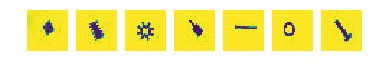

In [79]:
for i in range(7):
    plt.subplot(1,7, i+1)
    plt.axis('off')
    plt.imshow(np.array(Image.open(list_training[i*300])))

In [58]:
def read_image(path):
    image = np.array(Image.open(path))
    return image.reshape(image.shape[0], image.shape[1], 1)

In [60]:
label_name_list = []
for path in list_training:
    label_name_list.append(get_label_from_path(path))

In [47]:
label_name_list

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [48]:
len(label_name_list)

2100

In [61]:
unique_label_names = np.unique(label_name_list)
unique_label_names

array([1, 2, 3, 4, 5, 6, 7])

In [62]:
def onehot_encode_label(path):
    onehot_label = unique_label_names == get_label_from_path(path)
    onehot_label = onehot_label.astype(np.uint8)
    return onehot_label

In [63]:
onehot_encode_label(list_training[0])

array([0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [64]:
read_image(list_training[0]).shape

(28, 28, 1)

In [65]:
batch_size = 30
img_h = 28
img_w = 28
ch_n = 1
num_class = 7

In [66]:
batch_image = np.zeros((batch_size, img_h, img_w, ch_n))
batch_label = np.zeros((batch_size, num_class))

In [67]:
batch_image.shape, batch_label.shape

((30, 28, 28, 1), (30, 7))

In [68]:
for n, path in enumerate(list_training[:batch_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    batch_image[n,:, :, :] = image
    batch_label[n,: ] = onehot_label

In [69]:
batch_image

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [254.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[253.],
         [253.],
         [252.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
      

In [70]:
batch_image.shape, batch_label.shape

((30, 28, 28, 1), (30, 7))

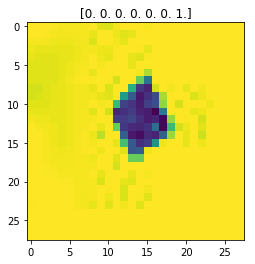

In [71]:
plt.title(batch_label[0])
plt.imshow(batch_image[0,:,:,0])
plt.show()

In [72]:
batch_per_epoch = batch_size // len(list_training)
batch_per_epoch

0

In [80]:
len(list_training)

2100